Knowledge about the data 
Creatinine: a protein that is often used as an indicator of kidney function.
YVLE1: lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
REG1B: a protein that may be associated with pancreas regeneration
TFF1: trefoil factor 1, which may be related to regeneration and repair of the urinary tract


In [113]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px



In [114]:
df = pd.read_csv("Debernardi et al 2020 data.csv")
df.head(5)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [115]:
df.shape

(590, 14)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

Stage, Benign Sample Diagnosis, Plasma_CA19_9, REG1A have null values

In [117]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_nan

['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']

Getting Rid of Extra Columns

In [118]:
#del(df['stage'])
#del(df['benign_sample_diagnosis'])
#del(df['sample_id'])
#del(df[''])
df1 = df.drop(columns = ['stage', 'benign_sample_diagnosis', 'sample_id', 'patient_cohort', 'sample_origin', 'sex', 'age', 'diagnosis'])

In [137]:

for i in len(df['diagnosis']):
    if i == 1:
        mean_1 = df1['plasma_CA19_9'].mean()


TypeError: 'int' object is not iterable

In [89]:
df1['plasma_CA19_9'].fillna(int(df['plasma_CA19_9'].mean()), inplace=True)
df1['REG1A'].fillna(int(df['REG1A'].mean()), inplace=True)

no more missing values

In [119]:
df1.isna().sum()

plasma_CA19_9    240
creatinine         0
LYVE1              0
REG1B              0
TFF1               0
REG1A            284
dtype: int64

In [120]:
df1.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [121]:
len(df['diagnosis'].unique())

3

In [122]:
print(df['diagnosis'].unique())

[1 2 3]


1 = Healthy 
2 = Non-Cancerous Pancreas Condition
3 = Pancreatic Cancer

In [123]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    #df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    #if df.shape[1] < 2:
    #    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
    #    return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

/var/folders/8n/mnfgwnzn6g392_syppl5nr3m0000gn/T/ipykernel_75032/620108808.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(corrMat)


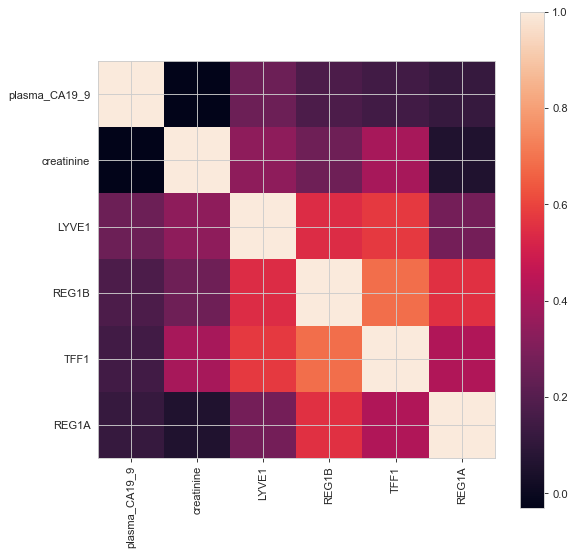

In [124]:
plotCorrelationMatrix(df1, 8)

Most Correlated seem to be REG1B and TFF1

Setting Diagnosis state of cancer is 1 and otherwise 0 for non-cancer

In [125]:
df1.head()

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [126]:
x = df1
y = df['diagnosis']

Support Vector Machine

In [127]:
from sklearn import svm
from sklearn.model_selection import train_test_split

clf = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(df1, y, random_state=42, test_size = 0.28, stratify = y)

SVM = clf.fit(X_train, y_train)

score = SVM.score(X_test, y_test)
print('Test set score: {}'.format(score))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [104]:
print(X_train.shape)
print(X_test.shape)

(424, 6)
(166, 6)


In [106]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [107]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,X_test_scaled,y_test)

              precision    recall  f1-score   support

           1       0.65      0.88      0.75        51
           2       0.63      0.41      0.49        59
           3       0.71      0.75      0.73        56

    accuracy                           0.67       166
   macro avg       0.67      0.68      0.66       166
weighted avg       0.66      0.67      0.65       166



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/

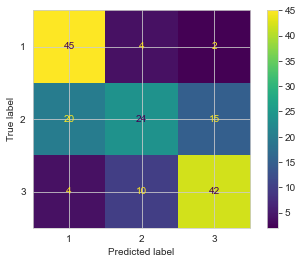

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv)

              precision    recall  f1-score   support

           1       0.45      0.88      0.60        51
           2       0.41      0.24      0.30        59
           3       0.81      0.46      0.59        56

    accuracy                           0.51       166
   macro avg       0.56      0.53      0.50       166
weighted avg       0.56      0.51      0.49       166



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


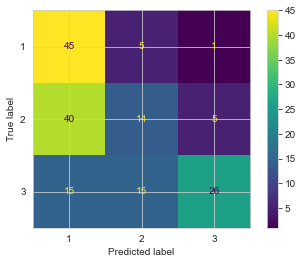

In [109]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb=GaussianNB()
model_train_test(gnb)

              precision    recall  f1-score   support

           1       0.53      0.80      0.64        51
           2       0.36      0.22      0.27        59
           3       0.67      0.62      0.65        56

    accuracy                           0.54       166
   macro avg       0.52      0.55      0.52       166
weighted avg       0.52      0.54      0.51       166



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


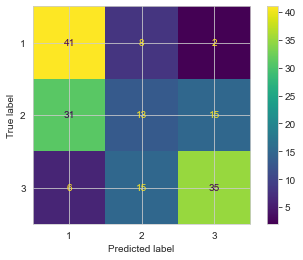

In [110]:
bnb=BernoulliNB()
model_train_test(bnb)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


              precision    recall  f1-score   support

           1       0.63      0.76      0.69        51
           2       0.63      0.44      0.52        59
           3       0.73      0.82      0.77        56

    accuracy                           0.67       166
   macro avg       0.66      0.68      0.66       166
weighted avg       0.66      0.67      0.66       166



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


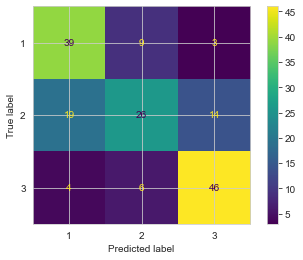

In [112]:
model_train_test(KNeighborsClassifier(n_neighbors=18))